# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

# Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Parse and Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [9]:
# Extract all rows of data
mars_table = html_soup.find('table')
#mars_table  --  uncomment to display the scraped data

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
mars_list = []
mars_rows = mars_table.find_all('tr')
print(mars_rows)

[<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>, <tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740

In [11]:
# Create an empty list
mars_facts_columns= []
heading = mars_table.find_all('th')
print(heading)
# Loop through the rows
for each in heading:
    row_heading = each.text
    mars_facts_columns.append(row_heading)
mars_facts_columns    
    


[<th>id</th>, <th>terrestrial_date</th>, <th>sol</th>, <th>ls</th>, <th>month</th>, <th>min_temp</th>, <th>pressure</th>]


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [12]:
# Loop through the scraped data to create a list of rows
mars_facts_data =[]
row_data = mars_table.find_all('tr',class_ = "data-row")
#row_data
for each_row_item in row_data:
    row_details = each_row_item.find_all('td')
    #print(row_details)
    #extract details for the data
    each_row_data = [each.text for each in row_details] 
    mars_facts_data.append(each_row_data)
# --  uncomment below to see the detailed data    
# mars_facts_data    

In [13]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_facts_data, columns = mars_facts_columns)


In [14]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [15]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [16]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype('int64')
mars_df['ls'] = mars_df['ls'].astype('int64')
mars_df['month'] = mars_df['month'].astype('int64')
mars_df['min_temp'] = mars_df['min_temp'].astype('float')
mars_df['pressure'] = mars_df['pressure'].astype('float')


In [17]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [18]:
# 1. How many months are there on Mars?
total_months = mars_df['month'].value_counts()
total_months

4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: month, dtype: int64

In [19]:
# 2. How many Martian days' worth of data are there?
len(mars_df['sol'].unique())

1867

In [20]:
# 3. What is the average low temperature by month?
average_low_temp = mars_df.groupby('month')["min_temp"].mean()
average_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

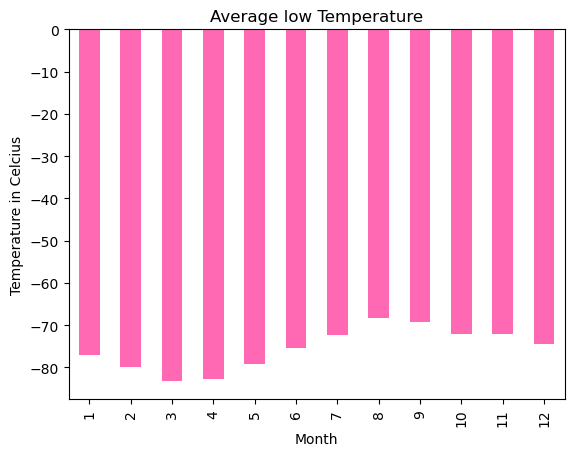

In [21]:
# Plot the average temperature by month
average_low_temp.plot(kind='bar', color = 'hotpink')
#create titles
plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')
plt.title("Average low Temperature")
plt.show()


The coldest month from the graph is 3 and hottest is 8

In [22]:
# Identify the coldest and hottest months in Curiosity's location
min_temp = average_low_temp.min()
max_temp = average_low_temp.max()
Coldest_month = average_low_temp.loc[average_low_temp == min_temp].index[0]
Hottest_month = average_low_temp.loc[average_low_temp == max_temp].index[0]

print(f"The coldest is {Coldest_month} and hottest month is {Hottest_month}  in Curiosity's location")

The coldest is 3 and hottest month is 8  in Curiosity's location


In [23]:
# 4. Average pressure by Martian month
average_pressure= mars_df.groupby('month')["pressure"].mean()
average_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

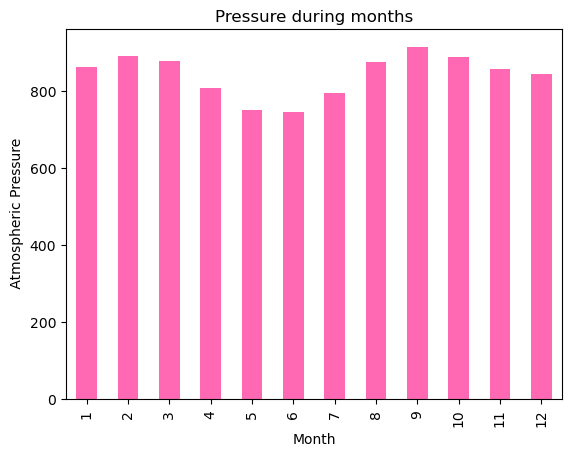

In [24]:
# Plot the average pressure by month
average_pressure.plot(kind='bar', color = 'hotpink')
#create titles
plt.xlabel('Month')
plt.ylabel(' Atmospheric Pressure')
plt.title("Pressure during months")
plt.show()

In [25]:
min_pressure = average_pressure.min()
max_pressure = average_pressure.max()
Low_pressure_month= average_pressure.loc[average_pressure == min_pressure].index[0]
High_pressure_month = average_pressure.loc[average_pressure == max_pressure].index[0]

print(f" Low pressure month {Low_pressure_month} , high pressure month {High_pressure_month}")

 Low pressure month 6 , high pressure month 9


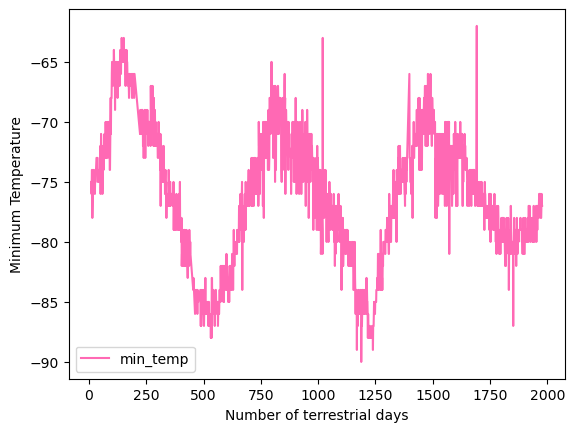

The distance from peak to peak is roughly 670 days on earth 


In [26]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#The Earth zips around the Sun making a full revolution in about 365 days – one year on Earth.
#Mars is a little slower, and farther from the sun, so a full circuit takes 687 Earth days – or one Mars year.[google search]
#https://www.jpl.nasa.gov/edu/learn/video/mars-in-a-minute-how-long-is-a-year-on-mars/#:~:text=Video%20Transcript,days%20%E2%80%93%20or%20one%20Mars%20year.
mars_df.plot.line(x = "sol", y = "min_temp" , color = 'hotpink')
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum Temperature")
plt.show()
p_to_p = (780-110)
print(f"The distance from peak to peak is roughly {p_to_p} days on earth ")

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [27]:
# Write the data to a CSV
mars_df.to_csv('mars_df.csv')

In [28]:
browser.quit()